# Pauli based manuel wire cutting implementation using Pennylane for dividing a GHZ quantumcircuit

* Author: Michel Meulen
* Date: 25-02-2025
* Contact: michel.meulen@tno.nl
-----------------------------------
This notebook illustrates a method for partitioning a Greenberger-Horne-Zeilinger (GHZ) quantum circuit, with an arbitrary number of qubits, into manageable subcircuits using the Pauli-based wire cutting technique. The notebook then outlines how to reconstruct the measurement outcomes of the full circuit by appropriately combining the results obtained from measuring these subcircuits. The implementation is based on this paper: [CutQC: Using Small Quantum Computers for Large Quantum Circuit Evaluations](https://arxiv.org/pdf/2012.02333). Important to note is this implementation does not require classical communication between sub-circuits.

First start by importing all required software classes used in this notebook:

In [1]:
from GHZ_pauli_wire_cut import GHZPauliWireCut

# Utility functions
from quantum_utils import QuantumUtils as qu
from quantum_wire_cutting import QuantumWireCutUtils as qwcu

# Circuit configurations required for custom gate configuration:
from circuit_configurations.circuit_configuration import CircuitConfiguration
from circuit_arguments.circuit_gate_argument import CircuitGateArgument
from circuit_gate import CircuitGate

# Circuit configurations for creating random gates configuration:
from circuit_configurations.circuit_random_gates_configuration import RandomCircuitGatesConfiguration

# Circuit configurations for creating random rotations and angles configuration:
from circuit_configurations.circuit_random_rotations_configuration import RandomCircuitRotationsConfiguration

For this experiment multiple constant paramteres can be set:

In [2]:
NUMBER_OF_QUBITS = 5  # Min: 2,   Recommended: 5,       Max: 10
NUMBER_OF_CUTS = 2  # Min: 1,   Recommended: 3,       Max: NUMBER_OF_QUBITS - 1
SHOTS_BUDGET = 2000  # Min: 100,   Recommended: 1000,    Max: 10000

(Optional & advanced) It is also possible to add a configuration to the circuit. With this configuration you can add single qubit gates 
on specific qubits to make the GHZ quantum circuit more interesting. You can choose between three different types of configurations which add certain gates in the GHZ quantum circuit. The configurations are: 
* Custom qubit gates        (X, Y, Z, S)
* Random qubit gates        (X, Y, Z, S)
* Random rotation gates     (RX , RY, RZ)

In [3]:
# If you want to run the GHZ quantum circuit with no additional extra gates, you can use this example:
CIRCUIT_CONFIG = None

# If you want to create custom gates configuration, you can use this example:
# CIRCUIT_CONFIG = CircuitConfiguration(
#     [
#         CircuitGateArgument(1, CircuitGate.X),
#         CircuitGateArgument(2, CircuitGate.Y),
#         CircuitGateArgument(3, CircuitGate.Z),
#         CircuitGateArgument(4, CircuitGate.S),
#     ]
# )

# If you want to make a random configuration of gates, you can use this example:
# CIRCUIT_CONFIG = RandomCircuitGatesConfiguration(NUMBER_OF_QUBITS, NUMBER_OF_QUBITS)

# If you want to make a random configuration of random rotation gates and angles, you can use this example:
# CIRCUIT_CONFIG = RandomCircuitRotationsConfiguration(NUMBER_OF_QUBITS, NUMBER_OF_QUBITS)

With the parameters, defined above this text, the 'GHZPauliWireCut' object is contstructed. It functions as a high-level object this notebook will access to run the experiment.

In [4]:
exp = GHZPauliWireCut(
    numQubits=NUMBER_OF_QUBITS,
    numCuts=NUMBER_OF_CUTS,
    shotsBudget=SHOTS_BUDGET,
    config=CIRCUIT_CONFIG,
)
print(exp.originalCircuit.ToString())

Original circuit: Original with 5 qubits; shots: 1000 and 
None


With set configuration the originial quantum circuit, which we want to apply Pauli based wire cutting to, can be visualised using the following function:

In [5]:
exp.originalCircuit.Visualise()

Original GHZ state quantum circuit:
0: ──H─╭●──────────┤ ╭Probs
1: ────╰X─╭●───────┤ ├Probs
2: ───────╰X─╭●────┤ ├Probs
3: ──────────╰X─╭●─┤ ├Probs
4: ─────────────╰X─┤ ╰Probs




While the original circuit is constructed, so are all subcircuits. The subcircuits are built to get the smallest qubit size for each subcircuit while taking into account the configuration if provided.

In [6]:
for circuit in exp.subCircuits:
    circuit.Visualise()

Subcircuit: 0 with 3 qubits; has position BEGIN and 315 shots budget; contribution:  Contribution: from: 0 to: 2 length: 2 of total: 5; bitstring: [00]XXX
0: ──H─╭●────┤ ╭Probs
1: ────╰X─╭●─┤ ├Probs
2: ───────╰X─┤ ╰Probs


Subcircuit: 1 with 2 qubits; has position INTERMEDIATE and 1260 shots budget; contribution:  Contribution: from: 2 to: 3 length: 1 of total: 5; bitstring: XX[0]XX
0: ─╭●─┤ ╭Probs
1: ─╰X─┤ ╰Probs


Subcircuit: 2 with 2 qubits; has position END and 420 shots budget; contribution:  Contribution: from: 3 to: 5 length: 2 of total: 5; bitstring: XXX[00]
0: ─╭●─┤ ╭Probs
1: ─╰X─┤ ╰Probs




Wire cutting creates quantum resource overhead due the many measurements of the different subcircuits. These measurements can be executed and saved using the following code:

In [7]:
numberOfShots = exp.DoSubCircuitMeasurements()
# (Optional) The measurements of each subcircuit can be visualised using the following function:
exp.PrintMeasurements()

Total sub-circuit shots used for measurements:  2000
0 0_p0_mX prepareBasis: 0 measureBasis: X shots: 105
0 0_p0_mY prepareBasis: 0 measureBasis: Y shots: 105
0 0_p0_mZ prepareBasis: 0 measureBasis: Z shots: 105
1 1_p0_mX prepareBasis: 0 measureBasis: X shots: 105
1 1_p0_mY prepareBasis: 0 measureBasis: Y shots: 105
1 1_p0_mZ prepareBasis: 0 measureBasis: Z shots: 105
1 1_p1_mX prepareBasis: 1 measureBasis: X shots: 105
1 1_p1_mY prepareBasis: 1 measureBasis: Y shots: 105
1 1_p1_mZ prepareBasis: 1 measureBasis: Z shots: 105
1 1_p+_mX prepareBasis: + measureBasis: X shots: 105
1 1_p+_mY prepareBasis: + measureBasis: Y shots: 105
1 1_p+_mZ prepareBasis: + measureBasis: Z shots: 105
1 1_pi_mX prepareBasis: i measureBasis: X shots: 105
1 1_pi_mY prepareBasis: i measureBasis: Y shots: 105
1 1_pi_mZ prepareBasis: i measureBasis: Z shots: 105
2 2_p0_mZ prepareBasis: 0 measureBasis: Z shots: 105
2 2_p1_mZ prepareBasis: 1 measureBasis: Z shots: 105
2 2_p+_mZ prepareBasis: + measureBasis: Z shot

For comparison, both the original and sub-circuits are run and their probabilities visualized. Wirecutting generates observable noise. This noise is caused by the Hadamard gate on the first qubit. The noise is noticeable due to the logarithmic scale of the vertical axis. The noise is related to the number of shots; insufficient shots can lead to inaccuracy.

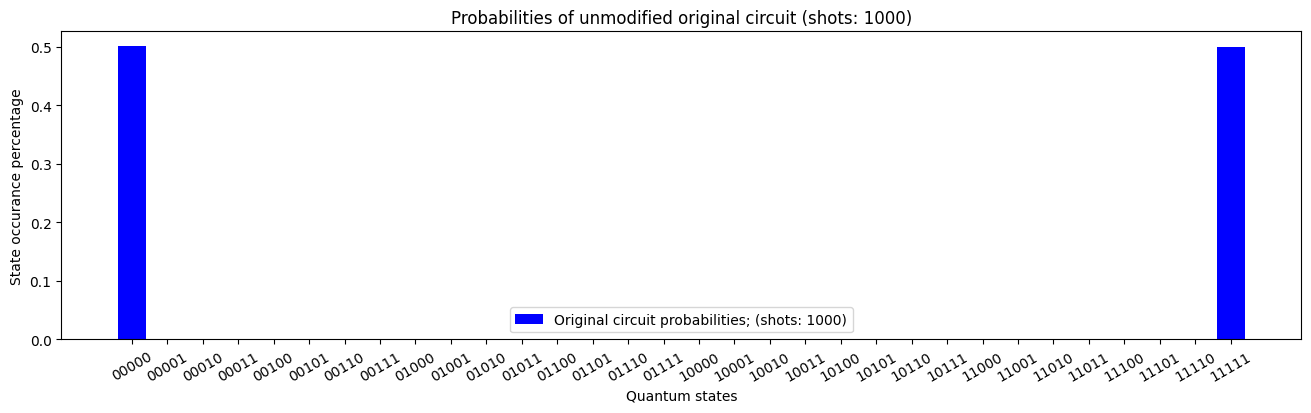

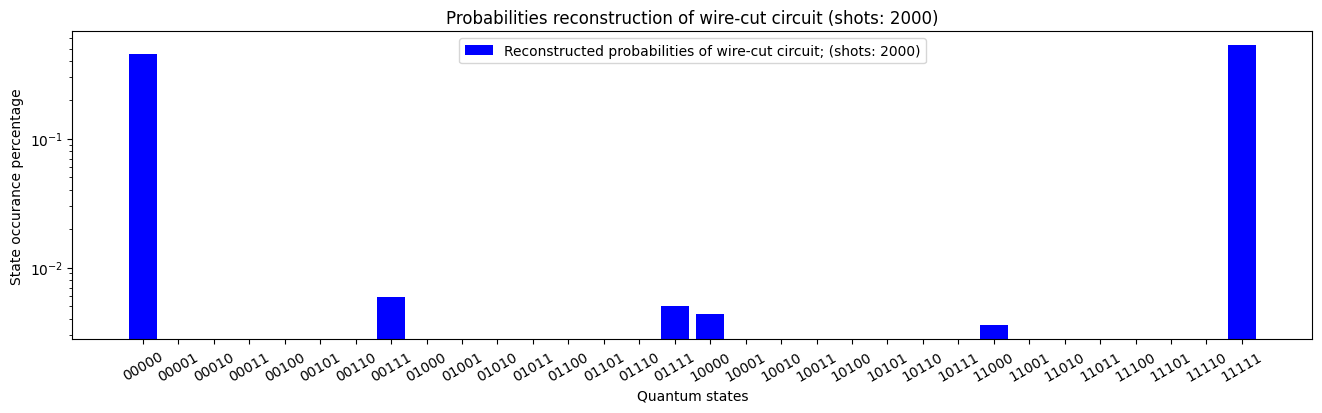

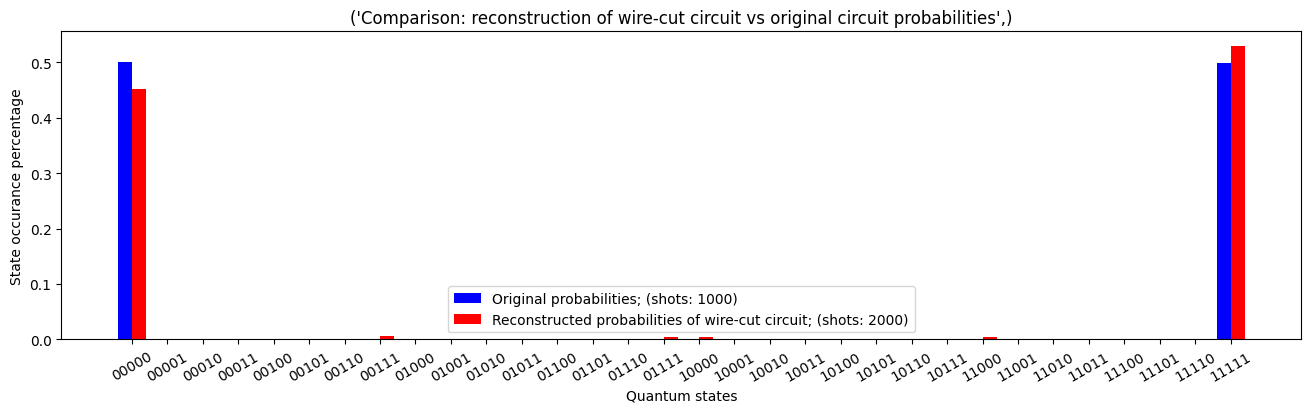

SUCCES


In [8]:
orgProbs = exp.RunOriginialCircuit()
cutProbs = exp.ConstructFullProbabilites()


qu.ProbabilitesToBarChart(probabilities=orgProbs, dataLabels=f"Original circuit probabilities; (shots: {exp.originalCircuit.shots})", title=f"Probabilities of unmodified original circuit (shots: {exp.originalCircuit.shots})")
qu.ProbabilitesToBarChart(probabilities=cutProbs, dataLabels=f"Reconstructed probabilities of wire-cut circuit; (shots: {numberOfShots})", title=f"Probabilities reconstruction of wire-cut circuit (shots: {numberOfShots})", verticalLog=True)

dataLabels = [f"Original probabilities; (shots: {exp.originalCircuit.shots})",f"Reconstructed probabilities of wire-cut circuit; (shots: {numberOfShots})"]
dataSets = [orgProbs, cutProbs]
title =  "Comparison: reconstruction of wire-cut circuit vs original circuit probabilities",

qu.ProbabilitesToBarChart(probabilities=dataSets, dataLabels=dataLabels, title=title)
if qwcu.EvaluateProbs(orgProbs, cutProbs, 0.1):
    print("SUCCES")
else:
    print("FAILURE")